In [ ]:
pip install cufflinks

In [ ]:
pip install palettable

In [ ]:
pip install Pillow

In [ ]:
import pandas as pd
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import plot,iplot
#pd.options.plotting.backend = "plotly"
import plotly.graph_objects as go
import plotly.express as px#graficos express
from google.colab import drive
drive.mount("/content/drive")
cf.go_offline()
pd.set_option("display.max_columns",200)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## FUNCIONES

In [ ]:
def rename_cols(df,cols,prefix):
    new_feats=[prefix+col for col in cols]
    df=df.rename(columns=dict(zip(cols,new_feats)))
    return df

def completitud(df):
    comp=pd.DataFrame(df.isnull().sum())
    comp.reset_index(inplace=True)
    comp=comp.rename(columns={"index":"columna",0:"total"})
    comp["completitud"]=(1-comp["total"]/df.shape[0])*100
    comp=comp.sort_values(by="completitud",ascending=True)
    comp.reset_index(drop=True,inplace=True)
    return comp

### TEXTO

In [ ]:
pip install unidecode

In [ ]:
pip install stylecloud 

In [ ]:
from palettable.cartocolors.qualitative import Bold_5
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk import FreqDist
from PIL import Image
import re
import stylecloud
import unicodedata
import nltk
import unicodedata
import pandas as pd

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**https://github.com/minimaxir/stylecloud**
- pip install stylecloud
-  pip install pillow


https://fontawesome.com/icons?d=gallery&m=free

https://jiffyclub.github.io/palettable/

https://pypi.org/project/emoji/

In [ ]:
def text_clean(text, pattern="[^a-zA-Z0-9 ]"):
    text_clean = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    text_clean= re.sub(pattern, " ", text_clean.decode("utf-8"), flags=re.UNICODE)
    text_clean = u' '.join(text_clean.lower().split())
    return text_clean

In [ ]:
#https://lopezobrador.org.mx/2021/01/22/version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador-464/
f = open("/content/drive/My Drive/G11 - Módulo I/Data/visualizaciones/amlo.txt", "r")
corpus=f.read()

In [ ]:
corpus

'vamos informar distribucion vacunas avance vacunacion hospitales covid sector publico sector privado tambien informar vacunacion maestros campeche partir manana vamos presentar dos vamos vacunacion general plan aplicar vacunas hospitales estan medicos enfermeras trabajadores salud atendiendo vidas vamos avance lleva corresponde sector publico privado tambien vacunacion va llevar cabo partir manana campeche maestros proposito solo ustedes siempre hacemos sino tambien distintos medios caso campeche medicos informacion trabajadores educacion proposito principal mexicanos estan pendientes informacion ayuda vamos vacunar manana calakmul xpujil calakmul seguro estan viendo estan calakmul mas campeche importa alla informacion esten modo vamos informar empezamos vacunacion general luego campeche informacion general vacunacion va ser doctor hugo gatell plan vacunacion campeche general sandoval entonces vamos escuchar hugo primero hugo gatell ramirez prevencion salud gusto gracias buenos dias s

In [ ]:
len(corpus.split())

11354

In [ ]:
lista_stopwords = stopwords.words("spanish")
texto_clean=text_clean(corpus)

In [ ]:
texto_clean

In [ ]:
fdist=FreqDist(texto_clean.split())

In [ ]:
fdist

FreqDist({'que': 557, 'de': 522, 'la': 348, 'a': 314, 'en': 311, 'y': 304, 'el': 286, 'se': 218, 'no': 201, 'es': 177, ...})

In [ ]:
hapaxes=fdist.hapaxes()
texto_clean=" ".join(list(filter(lambda x:x not in lista_stopwords,texto_clean.split())))
texto_clean=" ".join(list(filter(lambda x:x not in hapaxes,texto_clean.split())))
fdist=FreqDist(texto_clean.split())

In [ ]:
fdist

FreqDist({'si': 105, 'presidente': 83, 'lopez': 61, 'andres': 54, 'manuel': 54, 'obrador': 54, 'entonces': 50, 'tambien': 48, 'vamos': 47, 'mas': 47, ...})

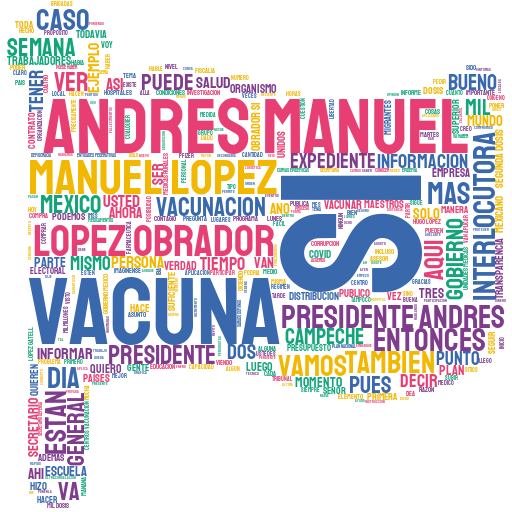

In [ ]:
with open("/content/drive/My Drive/visualizaciones/texto_wordcloud_amlo.txt","w") as f:
        f.write(texto_clean)

path_texto="/content/drive/My Drive/visualizaciones/texto_wordcloud_amlo.txt"
path_imagen="/content/drive/My Drive/visualizaciones/texto_wordcloud_amlo.png"

stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen)

Image.open(path_imagen)

texto_clean=texto_clean.replace("luis potosi","").replace("san luis","")

In [ ]:
fdist=FreqDist(texto_clean.split())

In [ ]:
pd.DataFrame(fdist.items()).sort_values(by=1,ascending=False)

,0,1
147,si,105
72,presidente,83
63,lopez,61
398,obrador,54
397,manuel,54
...,...,...
591,2020,2
286,llegar,2
587,estimados,2
288,necesidades,2


In [ ]:
words=list(pd.DataFrame(fdist.items()).sort_values(by=1,ascending=False)[1:6][0].values)

In [ ]:
for word in words:
    texto_clean=texto_clean.replace(word+" ","")

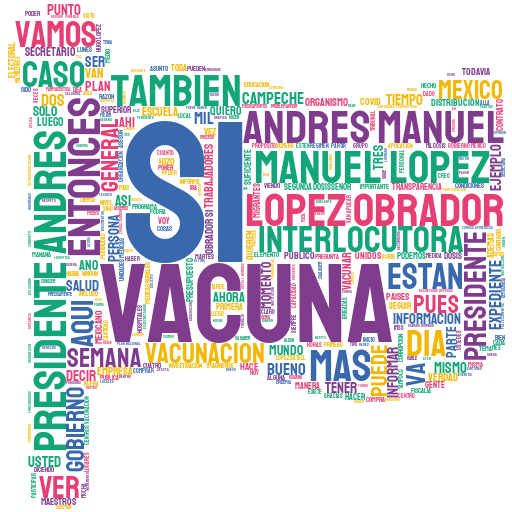

In [ ]:
 with open("/content/drive/My Drive/visualizaciones/texto_wordcloud_amlo.txt","w") as f:
        f.write(texto_clean)

path_texto="/content/drive/My Drive/visualizaciones/texto_wordcloud_amlo.txt"
path_imagen="/content/drive/My Drive/visualizaciones/texto_wordcloud_amlo.png"

stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen)

Image.open(path_imagen)

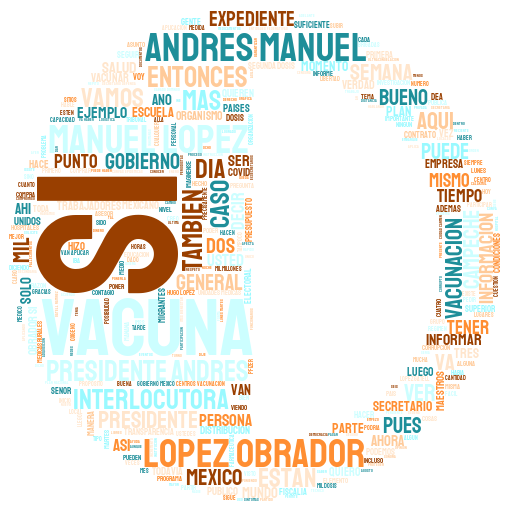

In [ ]:
#cambiar colores
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen,palette="lightbartlein.diverging.BlueDarkOrange12_7",icon_name="fas fa-adjust")
Image.open(path_imagen)

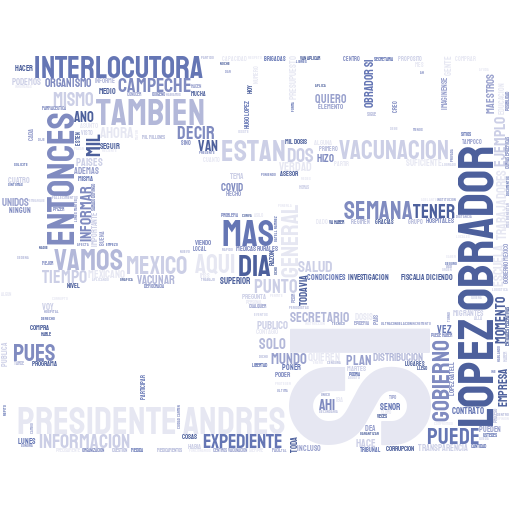

In [ ]:
#Mascaras
colors=["#4d609c","#6576b4","#808bc0","#99a1cd","#b3b8d9","#cccfe6","#e6e7f2","#ffffff"]
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen,colors=colors,icon_name="fas fa-address-card")

Image.open(path_imagen)

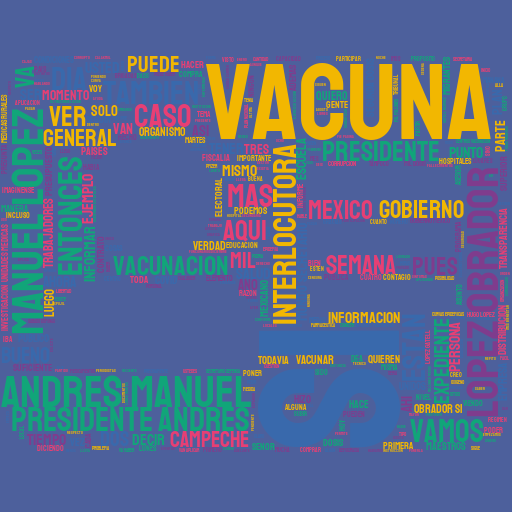

In [ ]:
#Background
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen,background_color='#4d609c',icon_name="fas fa-address-card")

Image.open(path_imagen)

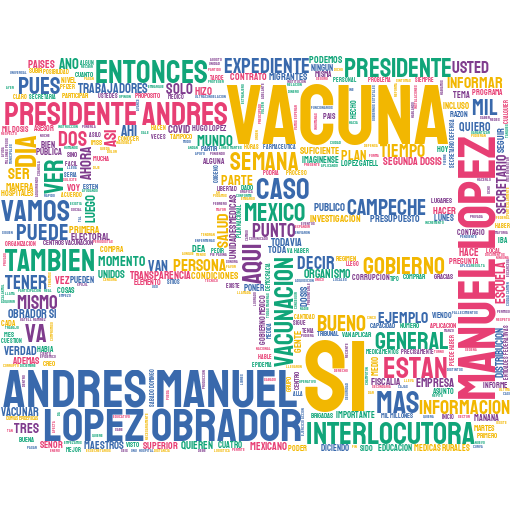

In [ ]:
#FONT SIZE
stylecloud.gen_stylecloud(file_path = path_texto,output_name=path_imagen,max_font_size=100,icon_name="fas fa-address-card")
Image.open(path_imagen)